In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_fly = pd.read_csv('F:\my project\dataset\learning_dataset\\international-airline-passengers.csv')
df_fly

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [3]:
df_fly.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'num_of_fly'},
              inplace=True)
df_fly.dropna(axis=0, inplace=True)
df_fly

,Month,num_of_fly
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


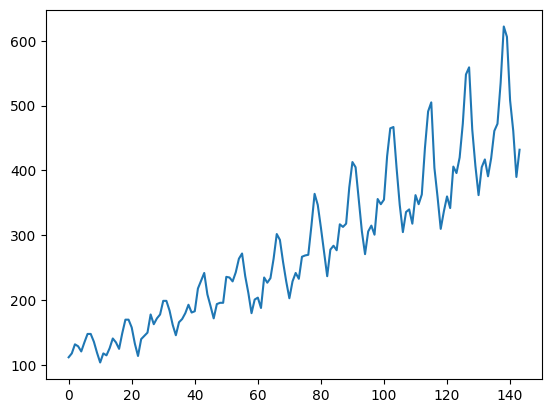

In [4]:
plt.plot(df_fly.num_of_fly)

In [5]:
max=np.max(df_fly.num_of_fly)

In [6]:
x = df_fly.num_of_fly / np.max(df_fly.num_of_fly)
x

0      0.180064
1      0.189711
2      0.212219
3      0.207395
4      0.194534
         ...   
139    0.974277
140    0.816720
141    0.741158
142    0.627010
143    0.694534
Name: num_of_fly, Length: 144, dtype: float64

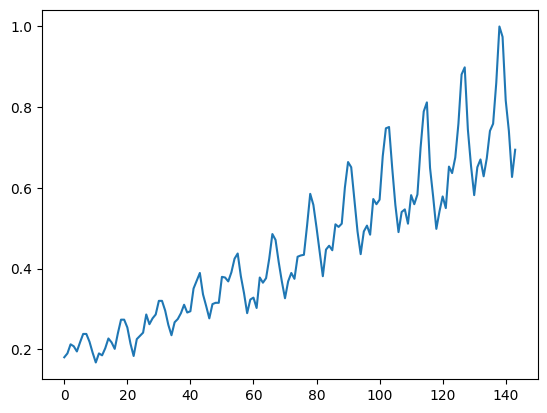

In [7]:
plt.plot(x)

In [8]:
x[10:]

10     0.167203
11     0.189711
12     0.184887
13     0.202572
14     0.226688
         ...   
139    0.974277
140    0.816720
141    0.741158
142    0.627010
143    0.694534
Name: num_of_fly, Length: 134, dtype: float64

In [9]:
train_size_split = 0.6

In [10]:
train_size = int(np.round(train_size_split * len(x)))
train_size

86

In [11]:
x_train = x[:train_size]
x_test = x[train_size:]

In [12]:
x_train

0     0.180064
1     0.189711
2     0.212219
3     0.207395
4     0.194534
        ...   
81    0.440514
82    0.381029
83    0.446945
84    0.456592
85    0.445338
Name: num_of_fly, Length: 86, dtype: float64

In [13]:
x_test

86     0.509646
87     0.503215
88     0.511254
89     0.601286
90     0.663987
91     0.651125
92     0.570740
93     0.491961
94     0.435691
95     0.491961
96     0.506431
97     0.483923
98     0.572347
99     0.559486
100    0.570740
101    0.678457
102    0.747588
103    0.750804
104    0.649518
105    0.557878
106    0.490354
107    0.540193
108    0.546624
109    0.511254
110    0.581994
111    0.559486
112    0.583601
113    0.699357
114    0.789389
115    0.811897
116    0.649518
117    0.577170
118    0.498392
119    0.541801
120    0.578778
121    0.549839
122    0.652733
123    0.636656
124    0.675241
125    0.758842
126    0.881029
127    0.898714
128    0.744373
129    0.654341
130    0.581994
131    0.651125
132    0.670418
133    0.628617
134    0.673633
135    0.741158
136    0.758842
137    0.860129
138    1.000000
139    0.974277
140    0.816720
141    0.741158
142    0.627010
143    0.694534
Name: num_of_fly, dtype: float64

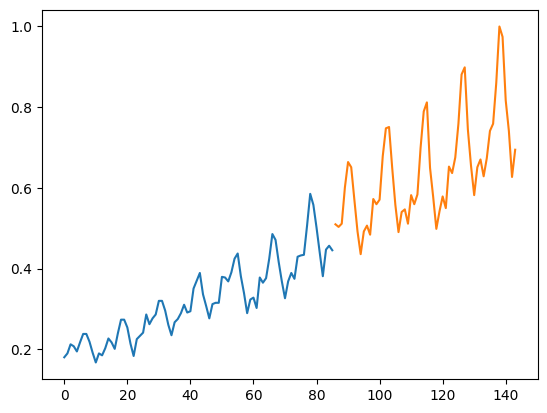

In [14]:
plt.plot(x_train)
plt.plot(x_test)

In [15]:
x_train[0:5]

0    0.180064
1    0.189711
2    0.212219
3    0.207395
4    0.194534
Name: num_of_fly, dtype: float64

In [16]:
def preprocess(data, step: int):
    app_x = []
    app_y = []
    for i in range(len(data)):
        if i <= (len(data) - (step+1)):
            app_x.append(data[i:i + step])
            app_y.append(data[i + step])
    return np.array(app_x), np.array(app_y)


In [17]:
look_back=5

In [18]:
x_tr_p, y_tr_p = preprocess(x_train, look_back)

In [19]:
x_train

0     0.180064
1     0.189711
2     0.212219
3     0.207395
4     0.194534
        ...   
81    0.440514
82    0.381029
83    0.446945
84    0.456592
85    0.445338
Name: num_of_fly, Length: 86, dtype: float64

In [20]:
x_tr_p

array([[0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376],
       [0.18971061, 0.21221865, 0.2073955 , 0.19453376, 0.2170418 ],
       [0.21221865, 0.2073955 , 0.19453376, 0.2170418 , 0.23794212],
       [0.2073955 , 0.19453376, 0.2170418 , 0.23794212, 0.23794212],
       [0.19453376, 0.2170418 , 0.23794212, 0.23794212, 0.21864952],
       [0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833],
       [0.23794212, 0.23794212, 0.21864952, 0.19131833, 0.16720257],
       [0.23794212, 0.21864952, 0.19131833, 0.16720257, 0.18971061],
       [0.21864952, 0.19131833, 0.16720257, 0.18971061, 0.18488746],
       [0.19131833, 0.16720257, 0.18971061, 0.18488746, 0.20257235],
       [0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ],
       [0.18971061, 0.18488746, 0.20257235, 0.2266881 , 0.2170418 ],
       [0.18488746, 0.20257235, 0.2266881 , 0.2170418 , 0.20096463],
       [0.20257235, 0.2266881 , 0.2170418 , 0.20096463, 0.23954984],
       [0.2266881 , 0.2170418 , 0.

In [21]:
y_tr_p

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [22]:
pd.DataFrame(x_test).reset_index().drop('index',axis=1)

,num_of_fly
0,0.509646
1,0.503215
2,0.511254
3,0.601286
4,0.663987
5,0.651125
6,0.570740
7,0.491961
8,0.435691
9,0.491961


In [23]:
x_ts_p,y_ts_p=preprocess(x_test.values,look_back)

In [24]:
x_ts_p

array([[0.5096463 , 0.50321543, 0.51125402, 0.60128617, 0.66398714],
       [0.50321543, 0.51125402, 0.60128617, 0.66398714, 0.6511254 ],
       [0.51125402, 0.60128617, 0.66398714, 0.6511254 , 0.57073955],
       [0.60128617, 0.66398714, 0.6511254 , 0.57073955, 0.49196141],
       [0.66398714, 0.6511254 , 0.57073955, 0.49196141, 0.43569132],
       [0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141],
       [0.57073955, 0.49196141, 0.43569132, 0.49196141, 0.50643087],
       [0.49196141, 0.43569132, 0.49196141, 0.50643087, 0.48392283],
       [0.43569132, 0.49196141, 0.50643087, 0.48392283, 0.57234727],
       [0.49196141, 0.50643087, 0.48392283, 0.57234727, 0.55948553],
       [0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955],
       [0.48392283, 0.57234727, 0.55948553, 0.57073955, 0.67845659],
       [0.57234727, 0.55948553, 0.57073955, 0.67845659, 0.74758842],
       [0.55948553, 0.57073955, 0.67845659, 0.74758842, 0.75080386],
       [0.57073955, 0.67845659, 0.

In [25]:
y_ts_p

array([0.6511254 , 0.57073955, 0.49196141, 0.43569132, 0.49196141,
       0.50643087, 0.48392283, 0.57234727, 0.55948553, 0.57073955,
       0.67845659, 0.74758842, 0.75080386, 0.64951768, 0.55787781,
       0.4903537 , 0.54019293, 0.54662379, 0.51125402, 0.58199357,
       0.55948553, 0.58360129, 0.69935691, 0.78938907, 0.81189711,
       0.64951768, 0.57717042, 0.49839228, 0.54180064, 0.57877814,
       0.54983923, 0.65273312, 0.63665595, 0.67524116, 0.75884244,
       0.88102894, 0.89871383, 0.74437299, 0.65434084, 0.58199357,
       0.6511254 , 0.67041801, 0.62861736, 0.67363344, 0.74115756,
       0.75884244, 0.86012862, 1.        , 0.97427653, 0.81672026,
       0.74115756, 0.62700965, 0.69453376])

In [26]:
train_x=x_tr_p.reshape(x_tr_p.shape[0],x_tr_p.shape[1],1)
tset_x=x_ts_p.reshape(x_ts_p.shape[0],x_ts_p.shape[1],1)
train_y=y_tr_p
test_y=y_ts_p

In [27]:
import tensorflow as tf

In [130]:
model=tf.keras.models.Sequential()

In [131]:
model.add(tf.keras.layers.LSTM(6,input_shape=(look_back,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
model.fit(train_x,train_y,batch_size=1,epochs=150)

Epoch 1/150
81/81 [==============================] - 3s 3ms/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 2/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 3/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 4/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 5/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 6/150
81/81 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 7/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 8/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 9/150
81/81 [==============================] - 0s 3ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 10/150
81/81 

In [28]:
x_true,y_true=preprocess(x,look_back)

In [29]:
predict=model.predict(x_true)

NameError: name 'model' is not defined

In [137]:
len(x)

144

In [138]:
len(predict)

139

In [141]:
type(predict)

numpy.ndarray

In [144]:
predict

array([[0.21101041],
       [0.22858202],
       [0.24813738],
       [0.24946722],
       [0.23407409],
       [0.2120933 ],
       [0.1914038 ],
       [0.20623268],
       [0.20293328],
       [0.21466433],
       [0.2349763 ],
       [0.23071557],
       [0.2175252 ],
       [0.2483916 ],
       [0.27975723],
       [0.28128913],
       [0.2657081 ],
       [0.23412369],
       [0.20814234],
       [0.23924792],
       [0.24708529],
       [0.25166422],
       [0.28878608],
       [0.27415034],
       [0.28513077],
       [0.29588267],
       [0.32621908],
       [0.3264446 ],
       [0.30636632],
       [0.27706444],
       [0.256059  ],
       [0.28168726],
       [0.28805235],
       [0.2977691 ],
       [0.31567785],
       [0.3018338 ],
       [0.30444157],
       [0.3546022 ],
       [0.3726164 ],
       [0.38744035],
       [0.34231454],
       [0.3202447 ],
       [0.29662266],
       [0.32685915],
       [0.32716522],
       [0.32411432],
       [0.37934175],
       [0.380

In [160]:
p=np.array([np.nan]*len(x))
for i in range(look_back,len(p)):
    p[i]=predict[i-look_back]

In [161]:
p

array([       nan,        nan,        nan,        nan,        nan,
       0.21101041, 0.22858202, 0.24813738, 0.24946722, 0.23407409,
       0.21209329, 0.19140381, 0.20623268, 0.20293328, 0.21466433,
       0.23497631, 0.23071557, 0.2175252 , 0.2483916 , 0.27975723,
       0.28128913, 0.26570809, 0.23412369, 0.20814234, 0.23924792,
       0.24708529, 0.25166422, 0.28878608, 0.27415034, 0.28513077,
       0.29588267, 0.32621908, 0.3264446 , 0.30636632, 0.27706444,
       0.25605899, 0.28168726, 0.28805235, 0.2977691 , 0.31567785,
       0.30183381, 0.30444157, 0.35460219, 0.37261641, 0.38744035,
       0.34231454, 0.3202447 , 0.29662266, 0.32685915, 0.32716522,
       0.32411432, 0.37934175, 0.38011834, 0.37029266, 0.39274997,
       0.42616913, 0.43512931, 0.38317099, 0.34985861, 0.31067851,
       0.34075093, 0.34188119, 0.31507403, 0.37882251, 0.37029791,
       0.37786099, 0.42220554, 0.47882339, 0.45997334, 0.41175058,
       0.37684986, 0.34616324, 0.38388792, 0.39796042, 0.37920

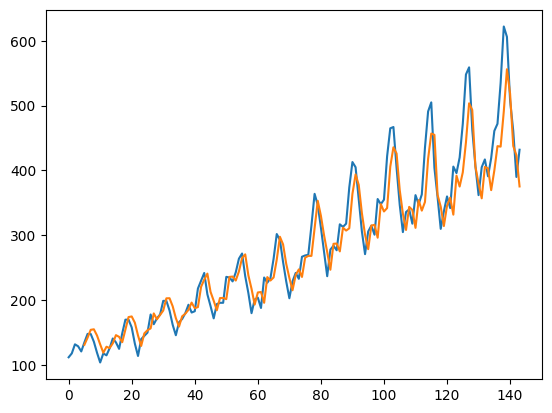

In [162]:
plt.plot(x*max)
plt.plot(p*max)

In [42]:
#train_x1=train_x.reshape(train_x.shape[:-1])

In [43]:
#train_x1

In [44]:
train_y

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [72]:
train_x.shape

(81, 5, 1)

In [45]:
model2=tf.keras.models.Sequential()

In [40]:
model2.add(tf.keras.layers.Dense(100,activation='relu',input_shape=(train_x.shape[1:],)))
model2.add(tf.keras.layers.Dense(100,activation='relu'))
model2.add(tf.keras.layers.Dense(1))

In [46]:
model2.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(0.001),metrics=['mean_absolute_error'])
model2.fit(train_x,train_y,batch_size=8,epochs=300)

Epoch 1/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0150 - mean_absolute_error: 0.0958
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0153 - mean_absolute_error: 0.0961
Epoch 3/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0982
Epoch 4/300
11/11 [==============================] - 0s 3ms/step - loss: 0.0156 - mean_absolute_error: 0.0987
Epoch 5/300
11/11 [==============================] - 0s 3ms/step - loss: 0.0159 - mean_absolute_error: 0.1000
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_absolute_error: 0.0950
Epoch 7/300
11/11 [==============================] - 0s 3ms/step - loss: 0.0159 - mean_absolute_error: 0.0989
Epoch 8/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0156 - mean_absolute_error: 0.0985
Epoch 9/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0153 - mean_absolute_error: 0.0958
Epoch 10/3

In [47]:
model2.evaluate(tset_x,test_y)

2/2 [==============================] - 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.1148


[0.022050583735108376, 0.11480964720249176]

In [48]:
x_true

array([[0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376],
       [0.18971061, 0.21221865, 0.2073955 , 0.19453376, 0.2170418 ],
       [0.21221865, 0.2073955 , 0.19453376, 0.2170418 , 0.23794212],
       [0.2073955 , 0.19453376, 0.2170418 , 0.23794212, 0.23794212],
       [0.19453376, 0.2170418 , 0.23794212, 0.23794212, 0.21864952],
       [0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833],
       [0.23794212, 0.23794212, 0.21864952, 0.19131833, 0.16720257],
       [0.23794212, 0.21864952, 0.19131833, 0.16720257, 0.18971061],
       [0.21864952, 0.19131833, 0.16720257, 0.18971061, 0.18488746],
       [0.19131833, 0.16720257, 0.18971061, 0.18488746, 0.20257235],
       [0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ],
       [0.18971061, 0.18488746, 0.20257235, 0.2266881 , 0.2170418 ],
       [0.18488746, 0.20257235, 0.2266881 , 0.2170418 , 0.20096463],
       [0.20257235, 0.2266881 , 0.2170418 , 0.20096463, 0.23954984],
       [0.2266881 , 0.2170418 , 0.

In [49]:
y_true

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [50]:
pr2=model2.predict(x_true)

5/5 [==============================] - 0s 2ms/step


In [53]:
pr2

array([[0.1800643 , 0.18971062, 0.21221864, 0.2073955 , 0.19453377],
       [0.18971062, 0.21221864, 0.2073955 , 0.19453377, 0.2170418 ],
       [0.21221864, 0.2073955 , 0.19453377, 0.2170418 , 0.23794213],
       [0.2073955 , 0.19453377, 0.2170418 , 0.23794213, 0.23794213],
       [0.19453377, 0.2170418 , 0.23794213, 0.23794213, 0.21864952],
       [0.2170418 , 0.23794213, 0.23794213, 0.21864952, 0.19131833],
       [0.23794213, 0.23794213, 0.21864952, 0.19131833, 0.16720258],
       [0.23794213, 0.21864952, 0.19131833, 0.16720258, 0.18971062],
       [0.21864952, 0.19131833, 0.16720258, 0.18971062, 0.18488745],
       [0.19131833, 0.16720258, 0.18971062, 0.18488745, 0.20257235],
       [0.16720258, 0.18971062, 0.18488745, 0.20257235, 0.2266881 ],
       [0.18971062, 0.18488745, 0.20257235, 0.2266881 , 0.2170418 ],
       [0.18488745, 0.20257235, 0.2266881 , 0.2170418 , 0.20096463],
       [0.20257235, 0.2266881 , 0.2170418 , 0.20096463, 0.23954985],
       [0.2266881 , 0.2170418 , 0.

In [51]:
pr2.shape

(139, 5)

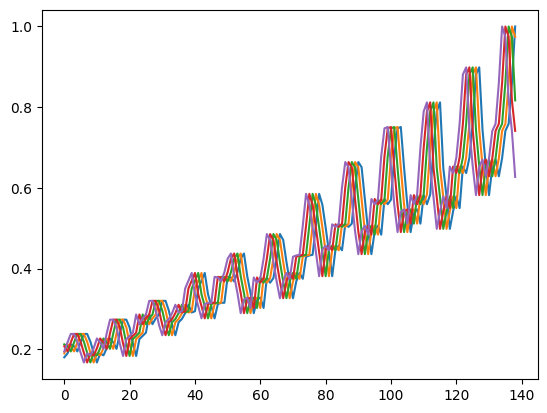

In [54]:
plt.plot(pr2[:,0])
plt.plot(pr2[:,1])
plt.plot(pr2[:,2])
plt.plot(pr2[:,3])
plt.plot(pr2[:,4])
#plt.plot(y_true)

In [55]:
len(pr2)

139

In [56]:
y_true

array([0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926045,
       0.43247588, 0.4340836 , 0.50643087, 0.585209  , 0.55787

In [58]:
constant=y_true[-1] /pr2[-1,0]

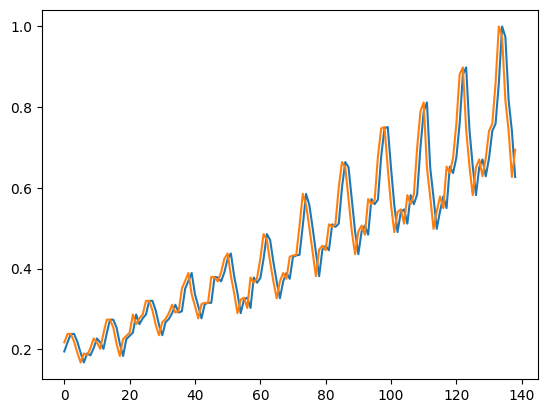

In [76]:
plt.plot(pr2[:,4])
plt.plot(y_true)

In [60]:
m=(y_true[-1]-y_true[0])/len(y_true)
m

0.003435193967012885

In [64]:
m2=(pr2[-1,0]-pr2[0,0])/len(pr2)
m2

0.005898817837667122

In [65]:
m*len(y_true)

0.47749196141479106

In [67]:
pr=pr2[:,:]

In [69]:
for i in range(len(pr)):
    pr[i,0]=pr[i,0]+i*m

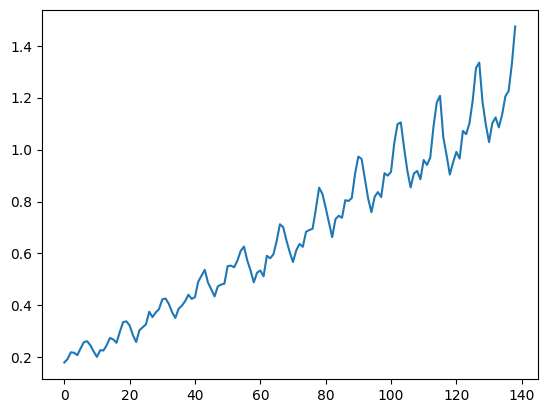

In [71]:
plt.plot(pr[:,0])